In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1 (15 pts.)

Let's start by working with the training data to gain some comfort working with the MNIST data.

### Part 1 (5 pts.)

Create a plot that shows 9 random images in the training data.  Label each image with its corresponding label.  Do the images match the labels?

In [3]:
train_X = pd.read_csv('MNISTTrainX.csv')
train_y = pd.read_csv('MNISTTrainy.csv')

train_X.head(10)

,Row1Col1,Row1Col2,Row1Col3,Row1Col4,Row1Col5,Row1Col6,Row1Col7,Row1Col8,Row1Col9,Row1Col10,...,Row12Col3,Row12Col4,Row12Col5,Row12Col6,Row12Col7,Row12Col8,Row12Col9,Row12Col10,Row12Col11,Row12Col12
0,0.208373,2.149420,4.393524,4.663838,0.815088,2.455425,0.516153,4.965205,0.591274,1.796688,...,1.216310,1.128552,2.369770,1.304721,0.685118,3.830583,2.533570,3.323730,0.656258,2.578943
1,2.062094,1.302770,0.731074,0.297352,0.445332,4.319977,3.568747,4.698489,0.819519,0.730667,...,1.557631,95.500000,110.250000,25.000000,0.602628,1.363546,0.049276,2.585815,1.215163,3.147223
2,3.586207,1.562192,1.385462,2.955427,1.487144,3.981333,0.857001,2.453603,3.832685,4.567475,...,2.519817,3.753734,3.324809,2.012294,3.614546,1.406220,3.441606,2.550375,3.714712,4.692276
3,0.566393,1.164012,2.130297,2.740770,3.787239,3.680939,1.698120,0.910737,0.272015,2.874669,...,0.017515,20.250000,5.500000,1.707689,0.589124,1.912237,1.561510,0.045762,1.174184,3.338042
4,0.191395,1.808040,1.204884,0.215383,2.349218,0.439817,3.605077,0.899726,3.895602,0.170513,...,4.856188,2.002859,3.114145,1.571268,1.825330,1.107996,1.123505,4.232555,1.892442,4.048254
5,4.621244,1.339600,0.485271,0.246580,2.635197,2.435012,0.360273,0.455037,3.377795,3.247410,...,1.121835,3.845459,2.048655,0.064141,3.104431,3.386691,3.727798,0.388319,3.815703,1.513111
6,4.876960,2.203477,1.092959,3.497815,3.638543,4.204007,3.615041,4.605765,3.792728,0.467467,...,2.074314,3.017529,1.833348,4.351687,1.776373,0.759780,1.854556,2.616618,3.929571,0.702452
7,3.111687,3.120859,4.185635,2.982212,2.124352,2.218981,3.781234,0.887920,1.709936,2.968942,...,1.010094,8.500000,20.500000,20.500000,20.500000,6.750000,4.536334,0.815623,2.315462,2.858432
8,3.059716,2.338004,1.880425,1.693557,3.325517,3.524616,3.235155,0.263056,3.178306,1.725875,...,2.469740,3.946507,1.794014,1.007737,1.596757,4.789845,1.897514,3.933004,0.621351,2.749725
9,4.634258,2.554775,3.175326,1.112507,3.344200,3.145666,3.808905,0.248028,4.004387,1.249440,...,4.217053,1.977330,4.503260,0.033686,2.091763,1.922534,4.759269,4.637558,1.443603,3.802271


In [4]:
train_y.head(10)

,label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [5]:
train_X.describe().style.background_gradient(cmap='coolwarm', axis=1)

,Row1Col1,Row1Col2,Row1Col3,Row1Col4,Row1Col5,Row1Col6,Row1Col7,Row1Col8,Row1Col9,Row1Col10,Row1Col11,Row1Col12,Row2Col1,Row2Col2,Row2Col3,Row2Col4,Row2Col5,Row2Col6,Row2Col7,Row2Col8,Row2Col9,Row2Col10,Row2Col11,Row2Col12,Row3Col1,Row3Col2,Row3Col3,Row3Col4,Row3Col5,Row3Col6,Row3Col7,Row3Col8,Row3Col9,Row3Col10,Row3Col11,Row3Col12,Row4Col1,Row4Col2,Row4Col3,Row4Col4,Row4Col5,Row4Col6,Row4Col7,Row4Col8,Row4Col9,Row4Col10,Row4Col11,Row4Col12,Row5Col1,Row5Col2,Row5Col3,Row5Col4,Row5Col5,Row5Col6,Row5Col7,Row5Col8,Row5Col9,Row5Col10,Row5Col11,Row5Col12,Row6Col1,Row6Col2,Row6Col3,Row6Col4,Row6Col5,Row6Col6,Row6Col7,Row6Col8,Row6Col9,Row6Col10,Row6Col11,Row6Col12,Row7Col1,Row7Col2,Row7Col3,Row7Col4,Row7Col5,Row7Col6,Row7Col7,Row7Col8,Row7Col9,Row7Col10,Row7Col11,Row7Col12,Row8Col1,Row8Col2,Row8Col3,Row8Col4,Row8Col5,Row8Col6,Row8Col7,Row8Col8,Row8Col9,Row8Col10,Row8Col11,Row8Col12,Row9Col1,Row9Col2,Row9Col3,Row9Col4,Row9Col5,Row9Col6,Row9Col7,Row9Col8,Row9Col9,Row9Col10,Row9Col11,Row9Col12,Row10Col1,Row10Col2,Row10Col3,Row10Col4,Row10Col5,Row10Col6,Row10Col7,Row10Col8,Row10Col9,Row10Col10,Row10Col11,Row10Col12,Row11Col1,Row11Col2,Row11Col3,Row11Col4,Row11Col5,Row11Col6,Row11Col7,Row11Col8,Row11Col9,Row11Col10,Row11Col11,Row11Col12,Row12Col1,Row12Col2,Row12Col3,Row12Col4,Row12Col5,Row12Col6,Row12Col7,Row12Col8,Row12Col9,Row12Col10,Row12Col11,Row12Col12
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,2.494740,2.513329,2.711239,3.541567,5.353176,7.913683,10.370386,10.353796,7.719288,4.459761,2.931388,2.550575,2.507421,3.023908,5.767967,13.718624,29.140248,50.644056,66.786330,64.544829,44.035681,22.063356,9.010079,3.696674,2.735369,5.439598,16.304477,39.780608,75.105629,109.507552,128.695478,124.376968,96.050026,54.254914,22.007640,6.767596,3.348156,8.817516,27.180596,63.541508,103.761001,115.212306,110.454691,115.059309,107.546340,67.479809,26.834090,6.925389,3.410182,9.064671,31.529197,75.362152,101.214802,83.934162,80.221397,100.511538,99.794849,58.933988,22.649509,5.143811,2.916876,8.898773,37.529349,83.146916,96.546816,86.731137,105.824417,121.963662,97.053181,49.627680,21.178706,5.092630,2.761102,10.794690,42.863600,82.648792,95.7

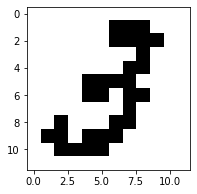

In [6]:
def plot_digit(X, bw=False, threshold=50, ax=None, **kwargs):
    assert len(X) == 144 and isinstance(X, np.ndarray)
    cmap = 'gray_r'
    if 'cmap' in kwargs:
        cmap = kwargs['cmap']
        del kwargs['cmap']

    X = X.reshape(12,12)
    if bw:
        X = (X > threshold).astype(int)*255
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(3,3))
    img = ax.imshow(X, cmap=cmap)
    return img

plot_digit(train_X.iloc[7777,:].to_numpy(), True, 105)

Text(0.5, 0.98, 'Randomly selected digits from the training set')

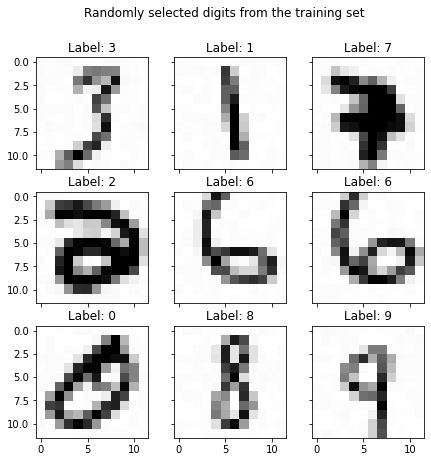

In [7]:
import random
fig, axs = plt.subplots(3,3,figsize=(7,7), sharex=True, sharey=True)
for i, ax in zip(range(10), axs.flatten()):
    index_rd = random.randint(0, len(train_X))
    plot_digit(train_X.iloc[index_rd,:].to_numpy(), bw=False, threshold=105, ax=ax)
    ax.set_title(f"Label: {train_y.iloc[index_rd,0]}")
fig.suptitle("Randomly selected digits from the training set")

### Part 2 (5 pts.)

For each digit (0 - 9), compute the average within class pixel value for each of the 144 pixels across the training data.  Create a plot that shows the 10 average digits.  Which class seems to show the most within class variation over images?  Which class seems to the least within class variation over images?


In [8]:
train_X.loc[train_y.query("label == 1").index,].mean(axis=0)

Row1Col1      2.527473
Row1Col2      2.489656
Row1Col3      2.472274
Row1Col4      2.556489
Row1Col5      2.570255
                ...   
Row12Col8     4.984525
Row12Col9     2.635044
Row12Col10    2.514537
Row12Col11    2.509231
Row12Col12    2.518327
Length: 144, dtype: float64

,Row1Col1,Row1Col2,Row1Col3,Row1Col4,Row1Col5,Row1Col6,Row1Col7,Row1Col8,Row1Col9,Row1Col10,...,Row12Col3,Row12Col4,Row12Col5,Row12Col6,Row12Col7,Row12Col8,Row12Col9,Row12Col10,Row12Col11,Row12Col12
0,2.465105,2.52203,2.567673,2.589474,2.914744,3.816678,4.531078,4.508223,3.81308,3.055749,...,4.247129,9.781316,17.53775,19.721763,14.452282,7.212133,3.453959,2.658262,2.585022,2.49662
1,2.527473,2.489656,2.472274,2.556489,2.570255,2.854144,3.325927,2.950887,2.891412,2.625402,...,4.085078,7.921546,11.62843,12.807547,11.896035,4.984525,2.635044,2.514537,2.509231,2.518327
2,2.475565,2.574087,3.498163,7.367956,14.414192,21.817748,24.04948,19.087107,10.187743,4.484698,...,3.196815,4.078344,4.460521,4.981771,4.902579,4.361451,4.034837,3.520218,3.091879,2.658653
3,2.516169,2.467417,2.590944,2.966534,4.318283,5.824365,5.751006,4.445568,3.485089,2.926889,...,13.456497,27.706007,40.533924,41.448563,30.531943,15.547873,5.79594,2.794524,2.482373,2.467381
4,2.512653,2.553874,2.481628,2.507038,2.677434,2.724938,2.865923,3.016629,2.994894,3.120629,...,3.581878,7.696682,16.822656,25.150354,29.415302,24.400766,14.431607,6.675635,3.311799,2.540618
5,2.503118,2.494946,2.454187,2.512955,2.615625,3.147024,3.834242,4.033972,4.158161,3.643108,...,6.952213,19.422205,33.740763,39.764694,30.596167,15.961913,7.093386,3.517541,2.696308,2.557159
6,2.506348,2.616558,3.539681,7.35202,16.497756,31.316491,51.476194,57.59012,41.845573,17.122706,...,2.511429,2.483695,2.483425,2.596662,2.558019,2.57022,2.53463,2.512514,2.442596,2.442033
7,2.497967,2.435069,2.456502,2.517286,2.481893,2.466013,2.513924,2.468729,2.486938,2.46037,...,15.446647,42.032655,79.75213,92.194394,70.281928,34.482931,11.839532,4.296083,2.612708,2.594864
8,2.47551,2.481532,2.540212,2.541603,2.564249,2.692133,2.842883,2.920589,2.762829,2.61301,...,8.141101,24.183639,45.809913,55.204575,42.35722,21.434429,8.343918,3.714545,2.677156,2.454123
9,2.467491,2.498123,2.511125,2.504319,2.47733,2.4773,2.513202,2.51614,2.567165,2.545054,...,6.88334,21.781868,49.400793,66.69761,60.153447,52.466674,32.29865,13.131391,5.016314,2.59998


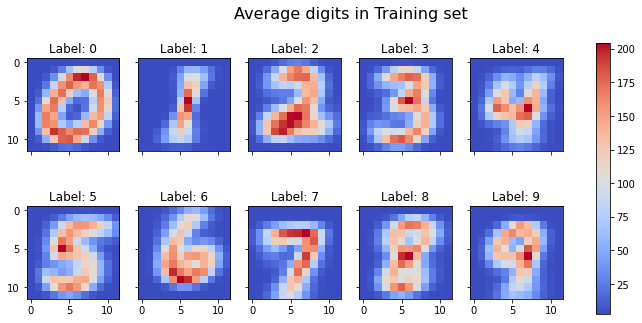

In [9]:
fig, axs = plt.subplots(2,5,figsize=(12,5), sharex=True, sharey=True)

average_digit_train = pd.DataFrame(columns=train_X.columns)

for i, ax in zip(range(11), axs.flatten()):
    idx = train_y.query(f"label == {i}").index
    X = train_X.loc[idx,:].mean(axis=0).to_numpy()
    average_digit_train.loc[i,:] = X
    img = plot_digit(X, bw=False, threshold=105, ax=ax, cmap='coolwarm')
    ax.set_title(f"Label: {i}")

fig.colorbar(img, ax=axs.flatten().tolist())
fig.suptitle("Average digits in Training set", fontsize=16)

average_digit_train

The amount of 'white space' on the plot above can be considered as the amount of within class variation. We can see digit '1' has the least within class variation, and digit '4' seems to have the most within class variation.

### Part 3 (5 pts.)

Using the average images, come up with a measure of similarity or dissimilarity between different digits.  It doesn't need to be particularly elegant. 

Which pairs of digits will be easiest to tell apart?  Which pairs will be most difficult?  Thinking about how people write different digits, does your similarity measure make sense?


1. Find the label $C$ that minimizes  $\|X_i - E(X_C)\|_2^2$, where $E(X_C)$ is the average vectorized image of digit $C$.

In [10]:
def expected_minimizer(X, y, avg=average_digit_train, table=False):
    
    result_df = pd.DataFrame(columns=['label', 'distance'])
    for i in range(10):
        D = X.to_numpy() - avg.loc[i,:].to_numpy()
        result_df.loc[i,:] = [i, np.linalg.norm(D, ord=2)]
    if table:
        print(f"Predicted label: {result_df.sort_values('distance').iloc[0,0]}, Actual label: {y}")
        print(result_df.sort_values('distance'))
    return result_df.sort_values('distance').iloc[0,0]

expected_minimizer(train_X.iloc[7777,:], train_y.iloc[7777,0], table=True)


Predicted label: 3, Actual label: 3
  label    distance
3     3  725.466375
5     5  793.341729
8     8  818.016998
2     2  825.718747
9     9  887.372978
4     4  892.905733
1     1  899.766994
7     7  925.704992
6     6  953.944861
0     0   996.12974


3

In [11]:
# In-sample Performance
pred_y = pd.DataFrame(columns=['label'])
for i in range(len(train_X)):
    pred_y.loc[i,:] = expected_minimizer(train_X.iloc[i,:], train_y.iloc[i,0])


In [12]:
# overall accuracy (in-sample)
print(f"Overall accuracy: {(pred_y == train_y).sum()/len(train_X)}")

# confusion matrix

confusion_matrix = pd.crosstab(train_y.values.flatten(), pred_y.values.flatten(), rownames=['Actual'], colnames=['Predicted'], normalize='index')
confusion_matrix.style.background_gradient(cmap='coolwarm', axis=1)

Overall accuracy: label    0.80088
dtype: float64


Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,0.874400,0.000800,0.006400,0.001600,0.002800,0.068400,0.024400,0.004800,0.013200,0.003200
1,0.000000,0.962800,0.003600,0.002800,0.000000,0.010400,0.000000,0.000000,0.018800,0.001600
2,0.011600,0.052400,0.763200,0.038800,0.028000,0.005200,0.037200,0.019200,0.039200,0.005200
3,0.007200,0.037200,0.033600,0.769600,0.000400,0.061200,0.004400,0.012000,0.052400,0.022000
4,0.002000,0.025200,0.004800,0.000000,0.794800,0.000000,0.018400,0.005600,0.013200,0.136000
5,0.019600,0.084400,0.006000,0.116800,0.022400,0.682400,0.022400,0.006400,0.019600,0.020000
6,0.013200,0.041200,0.025200,0.000400,0.016800,0.035200,0.862400,0.000000,0.005600,0.000000
7,0.006400,0.054800,0.010400,0.001200,0.024000,0.003600,0.000400,0.829600,0.021200,0.048400
8,0.006800,0.066400,0.010000,0.093200,0.008400,0.040800,0.011600,0.006400,0.712400,0.044000


In [13]:
pd.DataFrame({
    'labels': np.arange(10),
    'accuracy':confusion_matrix.values.diagonal()
    })

,labels,accuracy
0,0,0.8744
1,1,0.9628
2,2,0.7632
3,3,0.7696
4,4,0.7948
5,5,0.6824
6,6,0.8624
7,7,0.8296
8,8,0.7124
9,9,0.7572


In [14]:
validate_X = pd.read_csv('MNISTValidationX.csv')
validate_y = pd.read_csv('MNISTValidationY.csv')

val_pred_y = pd.DataFrame(columns=['label'])
for i in range(len(validate_X)):
    val_pred_y.loc[i,:] = expected_minimizer(validate_X.iloc[i,:], validate_y.iloc[i,0])



In [15]:
print(f"Overall accuracy on validation set: {(val_pred_y == validate_y).sum()/len(validate_X)}")

confusion_matrix = pd.crosstab(validate_y.values.flatten(), val_pred_y.values.flatten(), rownames=['Actual'], colnames=['Predicted'], normalize='index')
confusion_matrix.style.background_gradient(cmap='coolwarm', axis=1)

Overall accuracy on validation set: label    0.804533
dtype: float64


Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,0.868000,0.002000,0.005333,0.008000,0.001333,0.070667,0.028000,0.001333,0.013333,0.002000
1,0.000000,0.962000,0.010000,0.001333,0.000667,0.009333,0.003333,0.001333,0.010667,0.001333
2,0.016667,0.061333,0.761333,0.035333,0.032000,0.004000,0.030000,0.016000,0.038667,0.004667
3,0.011333,0.028667,0.027333,0.784000,0.000000,0.052000,0.007333,0.011333,0.052667,0.025333
4,0.001333,0.022667,0.004667,0.000000,0.792667,0.001333,0.018000,0.004000,0.018000,0.137333
5,0.017333,0.079333,0.003333,0.127333,0.030000,0.678667,0.016000,0.008667,0.014000,0.025333
6,0.008000,0.042667,0.020667,0.000000,0.018667,0.030667,0.874667,0.000000,0.004667,0.000000
7,0.004000,0.052667,0.008667,0.000667,0.020667,0.002000,0.000667,0.848000,0.012667,0.050000
8,0.011333,0.061333,0.012667,0.102000,0.008667,0.044667,0.006667,0.002000,0.714000,0.036667



## Question 2 (15 pts.)

Let's start with one of the digit pairs that is easiest to tell apart: 0s and 1s.  For this question, we'll build a classifier to discriminate between images of 0s and images of 1s.  Start by subsetting your training and validation data sets to only include 0s and 1s (a literal manifestation of the classification problem).

### Part 1 (8 pts.)

For reasons you will soon see, we'll only consider one classification approaches for this problem - logistic regression.  Using your training data, train a logistic regression classifier for the literal 0/1 problem.  Compute a 10-fold CV measure of expected prediction accuracy using the training data.  Similarly, compute the accuracy of your trained logistic regression model on the validation set.  What do you find here?

Intuitively, explain this result.  Think carefully about the how logistic regression is approaching this classification problem.

Plot up to 4 images in the validation set that are misclassified with respect to the Bayes' classifier.  Does this misclassification make sense?  What about these images leads the classifier to incorrectly guess the proper label?

Note: the underlying algorithm for logistic regression proceeds iteratively attempting to minimize the logistic regression loss function.  Because many of the predictors in this problem have variance close to zero, the default number of iterations (typically 25) may not be enough for the algorithm to converge.  You can deal with this issue by setting the maximum number of IRLS iterations to a larger value - 100 should be sufficient.  In R, this can be achieved within your `glm` call by adding an additional control argument - `control = list(maxit = 100)`.


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

training_01_X = train_X.copy().loc[train_y.query("label == 0 or label == 1").index,]
training_01_y = train_y.copy().loc[train_y.query("label == 0 or label == 1").index,]
validate_01_X = validate_X.copy().loc[validate_y.query("label == 0 or label == 1").index,]
validate_01_y = validate_y.copy().loc[validate_y.query("label == 0 or label == 1").index,]

logistic_reg = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='none')
cross_val_score(logistic_reg, training_01_X, training_01_y.values.flatten(), cv=10, scoring='accuracy')



array([1.   , 0.996, 1.   , 0.996, 1.   , 0.996, 0.998, 0.998, 1.   ,
       1.   ])

This probably indicates that the predictor space is very likely linearly separable in 0/1 case because logistic regression has linear decision boundary and we achieve almost 100% in-sample accuracy across all 10 folds.

In [17]:
logistic_reg.fit(training_01_X, training_01_y.values.flatten())
logistic_reg.score(validate_01_X, validate_01_y.values.flatten())

0.9973333333333333

We achieved similar accuracy on the validation set.

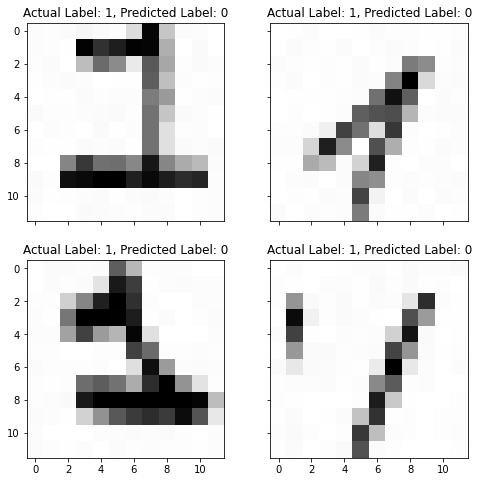

In [18]:
val_pred_y = logistic_reg.predict(validate_01_X)
misses_idx = np.where(val_pred_y != validate_01_y.values.flatten())[0]

fig, axs = plt.subplots(2,2,figsize=(8,8), sharex=True, sharey=True)
for i, ax, idx in zip(range(4), axs.flatten(), np.random.choice(misses_idx, size=4, replace=False)):
    plot_digit(validate_01_X.iloc[idx,:].to_numpy(), bw=False, threshold=105, ax=ax)
    ax.set_title(f"Actual Label: {validate_01_y.iloc[idx,0]}, Predicted Label: {val_pred_y[idx]}")

In [19]:
pd.crosstab(validate_01_y.values.flatten(), val_pred_y, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,1500,0
1,8,1492


In the training set, a small percentage of people writes digit '1' differently, which can be seen in the plot above. Ths cross table agrees with this result because only 1's are misclassified.

### Part 2 (7 pts.)

Let's try to understand exactly how this classifier is working.  For the training data, compute a logistic regression classifier with the LASSO penalty on the coefficients.  Use K-fold CV to find a value of $\lambda$ that sparsely represents the set of coefficient and viably minimizes the expected misclassification rate for out of sample data.

Using the coefficients associated with your chosen value of $\lambda$, create a plot that shows the relationship between the pixels and the coefficients.  Positive coefficients are associated with pixels where a pencil pixel in that location (value > 0) **increases** the predicted probability that the image is a 1 while negative coefficients are associated with pixels where a pencil pixel in that location (value > 0) **decreases** the predicted probability that the image is a 1.

Leveraging this plot, come up with a set of rules related to the location of pencil pixels that a human who had the pixel mappings could evaluate to determine if an image is a zero or one.  The rules don't need to exactly relate to specific pixels.  Rather, they can relate to relative location of the pixels (center vs. noncenter, for example).

This task is, more or less, an example of **computer vision** - trying to use classification methods to make computer view images in the same way as humans.


In [20]:
# Logistic LASSO
from sklearn.model_selection import GridSearchCV
lmbda_params = np.logspace(-7, 7, num=200)
logistic_lasso_grid = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=10000, penalty='l1', fit_intercept=True), param_grid={'C': 1/lmbda_params}, scoring='accuracy', cv=10, n_jobs=-1)
logistic_lasso_grid.fit(training_01_X, training_01_y.values.flatten())


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+07, 8.50448934e+06, 7.23263390e+06, 6.15098579e+06,
       5.23109931e+06, 4.44878283e+06, 3.78346262e+06, 3.21764175e+06,
       2.73644000e+06, 2.32720248e+06, 1.97916687e+06, 1.68318035e+06,
       1.43145894e+06, 1.21738273e+06, 1.03532184e...
       4.15040476e-06, 3.52970730e-06, 3.00183581e-06, 2.55290807e-06,
       2.17111795e-06, 1.84642494e-06, 1.57029012e-06, 1.33545156e-06,
       1.13573336e-06, 9.65883224e-07, 8.21434358e-07, 6.98587975e-07,
       5.94113398e-07, 5.05263107e-07, 4.29700470e-07, 3.65438307e-07,
       3.10786619e-07, 2.64308149e-07, 2.24780583e-07, 1.91164408e-07,
       1.62575567e-07, 1.38262217e-07, 1.17584955e-07, 1.00000000e-07])},
             scoring='accuracy')

<AxesSubplot:xlabel='lambda'>

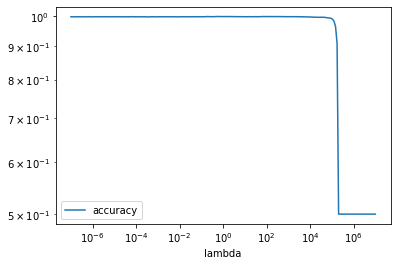

In [21]:
pd.DataFrame({
    'lambda': lmbda_params,
    'C': 1/lmbda_params,
    'accuracy':logistic_lasso_grid.cv_results_['mean_test_score']
    }).plot(x='lambda', y='accuracy', logx=True, logy=True)

In [22]:
logistic_lasso_grid.best_params_
print(f"Optimal Lambda: {1/logistic_lasso_grid.best_params_['C']}, or C: {logistic_lasso_grid.best_params_['C']}")
opt_lambda = 1/logistic_lasso_grid.best_params_['C']

Optimal Lambda: 0.5672426068491978, or C: 1.7629141180959478


In [23]:
logistic_lasso = LogisticRegression(solver='liblinear', max_iter=10000, penalty='l1', C=logistic_lasso_grid.best_params_['C'], fit_intercept=True)
logistic_lasso.fit(training_01_X, training_01_y.values.flatten())

LogisticRegression(C=1.7629141180959478, max_iter=10000, penalty='l1',
                   solver='liblinear')

In [24]:
logistic_lasso.score(training_01_X, training_01_y.values.flatten())

1.0

Text(0.5, 1.0, 'Positive/Negative-Probability Pixels')

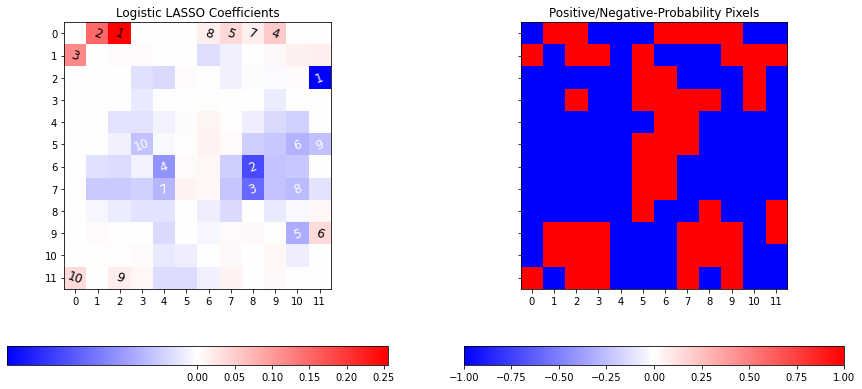

In [25]:
from matplotlib.colors import TwoSlopeNorm
fig, axs = plt.subplots(1,2,figsize=(15,7), sharex=True, sharey=True)
ax = axs[0]
img = ax.imshow(logistic_lasso.coef_[0].reshape(12,12), cmap='bwr', norm=TwoSlopeNorm(vcenter=0))
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(12))
fig.colorbar(img, ax=ax, orientation='horizontal')
ax.set_title('Logistic LASSO Coefficients')
arg_matrix = np.argsort(np.argsort(logistic_lasso.coef_[0])).reshape(12,12)
def flip_helper(x):
    if x > 5:
        return 10-x
    if x < 5:
        return x+5
    return 5

for i in range(12):
    for j in range(12):
        if arg_matrix[i,j] < 10:
            ax.text(j, i, arg_matrix[i, j]+1, ha='center', va='center', color='w', fontsize=12, rotation=20)
        if arg_matrix[i,j] >= 143-9:
            ax.text(j, i, flip_helper(arg_matrix[i, j]-133)+1, ha='center', va='center', color='black', fontsize=12, rotation=340)
ax = axs[1]
coef_10 = np.where(logistic_lasso.coef_[0] > 0, 1, -1)
img = ax.imshow(coef_10.reshape(12,12), cmap='bwr', norm=TwoSlopeNorm(vcenter=0))
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(12))
fig.colorbar(img, ax=ax, orientation='horizontal')
ax.set_title('Positive/Negative-Probability Pixels')



## Question 3 (25 pts.)

Now, let's work with a more difficult pair - 4s and 9s.  Logically, these are going to be more difficult to distinguish!  Start by subsetting your training and validation sets to only include 4s and 9s.  There may be some situations where you need to recode these to zeros and ones!  When making predictions on the test set, be sure to recode the predictions back to 4s and 9s.

### Part 1 (5 pts.)

Start by replicating your analysis for 0s and 1s using logistic regression for 4s and 9s.  Compute a 10-fold CV measure of expected prediction accuracy and find the misclassification rate for your validation set.  How does this compare to the performance of logistic regression for 0s and 1s?  Why do these results differ?

Using the same LASSO approach as above, create a plot that shows which pixels are important for the classification.  How does this image differ from the 0/1 case?


In [26]:
train_49_X = train_X.copy().loc[train_y.query("label == 4 or label == 9").index,]
train_49_y = train_y.copy().loc[train_y.query("label == 4 or label == 9").index,]
validate_49_X = validate_X.copy().loc[validate_y.query("label == 4 or label == 9").index,]
validate_49_y = validate_y.copy().loc[validate_y.query("label == 4 or label == 9").index,]

logistic_reg_49 = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='none')
cv_49_lr = cross_val_score(logistic_reg_49, train_49_X, train_49_y.values.flatten(), cv=10, scoring='accuracy')

print(f"Cross Validation Accuracy for 4/9 classification: {np.mean(cv_49_lr)}")

Cross Validation Accuracy for 4/9 classification: 0.9541999999999999


In [27]:
logistic_reg_49.fit(train_49_X, train_49_y.values.flatten())
print(f"Training Accuracy for 4/9 classification: {logistic_reg_49.score(train_49_X, train_49_y.values.flatten())}, Accuracy on validation set for 4/9 classification: {logistic_reg_49.score(validate_49_X, validate_49_y.values.flatten())}")

Training Accuracy for 4/9 classification: 0.9688, Accuracy on validation set for 4/9 classification: 0.9653333333333334


In [28]:
# Logistic LASSO
from sklearn.model_selection import GridSearchCV
lmbda_params = np.logspace(-7, 7, num=200)
logistic_lasso_grid = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=10000, penalty='l1', fit_intercept=True), param_grid={'C': 1/lmbda_params}, scoring='accuracy', cv=10, n_jobs=-1)
logistic_lasso_grid.fit(train_49_X, train_49_y.values.flatten())

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+07, 8.50448934e+06, 7.23263390e+06, 6.15098579e+06,
       5.23109931e+06, 4.44878283e+06, 3.78346262e+06, 3.21764175e+06,
       2.73644000e+06, 2.32720248e+06, 1.97916687e+06, 1.68318035e+06,
       1.43145894e+06, 1.21738273e+06, 1.03532184e...
       4.15040476e-06, 3.52970730e-06, 3.00183581e-06, 2.55290807e-06,
       2.17111795e-06, 1.84642494e-06, 1.57029012e-06, 1.33545156e-06,
       1.13573336e-06, 9.65883224e-07, 8.21434358e-07, 6.98587975e-07,
       5.94113398e-07, 5.05263107e-07, 4.29700470e-07, 3.65438307e-07,
       3.10786619e-07, 2.64308149e-07, 2.24780583e-07, 1.91164408e-07,
       1.62575567e-07, 1.38262217e-07, 1.17584955e-07, 1.00000000e-07])},
             scoring='accuracy')

<AxesSubplot:xlabel='lambda'>

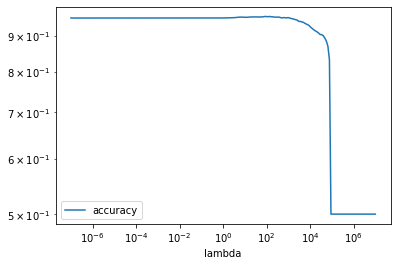

In [29]:
pd.DataFrame({
    'lambda': lmbda_params,
    'C': 1/lmbda_params,
    'accuracy':logistic_lasso_grid.cv_results_['mean_test_score']
    }).plot(x='lambda', y='accuracy', logx=True, logy=True)

In [30]:
logistic_lasso_grid.best_params_
print(f"Optimal Lambda: {1/logistic_lasso_grid.best_params_['C']}, or C: {logistic_lasso_grid.best_params_['C']}")
opt_lambda = 1/logistic_lasso_grid.best_params_['C']

Optimal Lambda: 86.03464416684491, or C: 0.011623224686798543


In [31]:
logistic_lasso = LogisticRegression(solver='liblinear', max_iter=10000, penalty='l1', C=logistic_lasso_grid.best_params_['C'], fit_intercept=True)
logistic_lasso.fit(train_49_X, train_49_y.values.flatten())

LogisticRegression(C=0.011623224686798543, max_iter=10000, penalty='l1',
                   solver='liblinear')

In [32]:
print(f"class 0: {logistic_lasso.classes_[0]}, class 1: {logistic_lasso.classes_[1]}")

class 0: 4, class 1: 9


In [33]:
print(f"Training Accuracy for 4/9 classification: {logistic_lasso.score(train_49_X, train_49_y.values.flatten())}, Accuracy on validation set for 4/9 classification: {logistic_lasso.score(validate_49_X, validate_49_y.values.flatten())}")

Training Accuracy for 4/9 classification: 0.9664, Accuracy on validation set for 4/9 classification: 0.966


Text(0.5, 1.0, 'Positive/Negative-Probability Pixels')

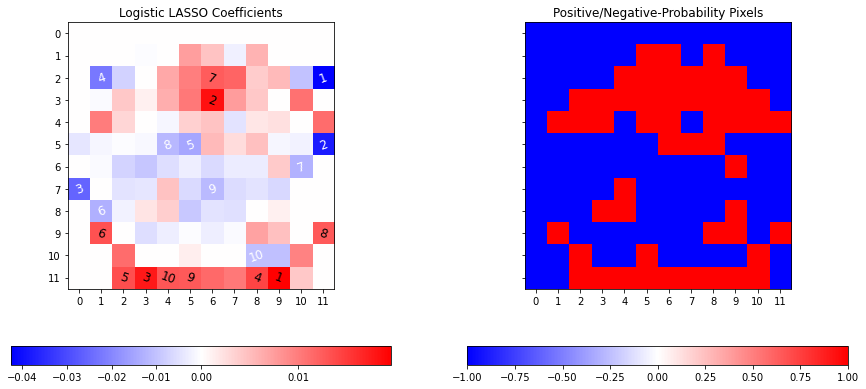

In [34]:
from matplotlib.colors import TwoSlopeNorm
fig, axs = plt.subplots(1,2,figsize=(15,7), sharex=True, sharey=True)
ax = axs[0]
img = ax.imshow(logistic_lasso.coef_[0].reshape(12,12), cmap='bwr', norm=TwoSlopeNorm(vcenter=0))
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(12))
fig.colorbar(img, ax=ax, orientation='horizontal')
ax.set_title('Logistic LASSO Coefficients')
arg_matrix = np.argsort(np.argsort(logistic_lasso.coef_[0])).reshape(12,12)
def flip_helper(x):
    if x > 5:
        return 10-x
    if x < 5:
        return x+5
    return 5

for i in range(12):
    for j in range(12):
        if arg_matrix[i,j] < 10:
            ax.text(j, i, arg_matrix[i, j]+1, ha='center', va='center', color='w', fontsize=12, rotation=20)
        if arg_matrix[i,j] >= 143-9:
            ax.text(j, i, flip_helper(arg_matrix[i, j]-133)+1, ha='center', va='center', color='black', fontsize=12, rotation=340)
ax = axs[1]
coef_10 = np.where(logistic_lasso.coef_[0] > 0, 1, -1)
img = ax.imshow(coef_10.reshape(12,12), cmap='bwr', norm=TwoSlopeNorm(vcenter=0))
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(12))
fig.colorbar(img, ax=ax, orientation='horizontal')
ax.set_title('Positive/Negative-Probability Pixels')



### Part 2 (5 pts.)

Compute QDA and Naive Bayes classifiers for the 4/9 problem.  Compare their performance to your logistic regression.  What's going on here?  Why do we see what we see?  Think carefully about the assumptions under-the-hood for QDA, Naive Bayes, and logistic regression and the structure of the pixel data in the MNIST data set.


In [35]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes

qda49_clf = QuadraticDiscriminantAnalysis()
qda49_clf.fit(train_49_X, train_49_y.values.flatten())

print(f"QDA:\nTraining Accuracy for 4/9 classification: {qda49_clf.score(train_49_X, train_49_y.values.flatten())}, Accuracy on validation set for 4/9 classification: {qda49_clf.score(validate_49_X, validate_49_y.values.flatten())}")

naive_bayes_49 = GaussianNB()
naive_bayes_49.fit(train_49_X, train_49_y.values.flatten())
print(f"Naive Bayes:\nTraining Accuracy for 4/9 classification: {naive_bayes_49.score(train_49_X, train_49_y.values.flatten())}, Accuracy on validation set for 4/9 classification: {naive_bayes_49.score(validate_49_X, validate_49_y.values.flatten())}")


QDA:
Training Accuracy for 4/9 classification: 0.951, Accuracy on validation set for 4/9 classification: 0.9346666666666666
Naive Bayes:
Training Accuracy for 4/9 classification: 0.7638, Accuracy on validation set for 4/9 classification: 0.772


To our surprise, QDA and Naive Bayes with normal marginals all perform worse than logistic regression and logistic LASSO. !!!!!wrong This could indicate that the predictor space for 4/9 is still linear separable, even though it seems to be a much more complicated problem than 0/1 classification.

QDA - Quadratic decision boundary

Gaussian Naive Bayes - assume independent predictor space

In [ ]:
# Use Perceptron to test if the data is linearly separable
from sklearn.linear_model import Perceptron
perceptron_clf = Perceptron(max_iter=1000, tol=1e-3, fit_intercept=True, eta0=1e-24, random_state=0)
perceptron_clf.fit(train_49_X, train_49_y.values.flatten())
perceptron_clf.score(train_49_X, train_49_y.values.flatten())

0.9324

### Part 3 (10 pts.)

Using the full suite of classification approaches discussed in class, find a classification approach that **minimizes** the expected misclassification rate of 4s and 9s on a true out of sample data set.

Your answer should discuss the possible approaches to this problem and explain how you made your final choice.  Discuss how you chose any tuning parameter values.

You do not need to run all possible classification methods to get full credit for this question!  There are some methods that we can rule out without ever running them.  When doing this, provide grounded reasoning related to the strengths and weaknesses of different approaches.

For your chosen method, explain **why** it outperforms all other approaches.  Think carefully about strengths and weaknesses.  

Finally, present at least 4 examples of misclassified images.  Could we ever expect a classification algorithm to get those images correct?



In [36]:
df_performance49 = pd.DataFrame(columns=['Classifier', 'Training Accuracy', 'Validation Accuracy'])
def add_row(classifier, train_acc, validate_acc):
    df_performance49.loc[len(df_performance49)] = [classifier, train_acc, validate_acc]

add_row('Logistic Regression', logistic_reg_49.score(train_49_X, train_49_y.values.flatten()), logistic_reg_49.score(validate_49_X, validate_49_y.values.flatten()))
add_row('Logistic LASSO', logistic_lasso.score(train_49_X, train_49_y.values.flatten()), logistic_lasso.score(validate_49_X, validate_49_y.values.flatten()))
add_row('QDA', qda49_clf.score(train_49_X, train_49_y.values.flatten()), qda49_clf.score(validate_49_X, validate_49_y.values.flatten()))
add_row('Naive Bayes', naive_bayes_49.score(train_49_X, train_49_y.values.flatten()), naive_bayes_49.score(validate_49_X, validate_49_y.values.flatten()))
df_performance49

,Classifier,Training Accuracy,Validation Accuracy
0,Logistic Regression,0.9688,0.965333
1,Logistic LASSO,0.9664,0.966000
2,QDA,0.9510,0.934667
3,Naive Bayes,0.7638,0.772000


In [37]:
# Logistic Ridge
lambda_params = np.logspace(-7, 7, num=200)
logistic_lasso_grid = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=10000, penalty='l2', fit_intercept=True), param_grid={'C': 1/lambda_params}, scoring='accuracy', cv=10, n_jobs=-1)
logistic_lasso_grid.fit(train_49_X, train_49_y.values.flatten())


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+07, 8.50448934e+06, 7.23263390e+06, 6.15098579e+06,
       5.23109931e+06, 4.44878283e+06, 3.78346262e+06, 3.21764175e+06,
       2.73644000e+06, 2.32720248e+06, 1.97916687e+06, 1.68318035e+06,
       1.43145894e+06, 1.21738273e+06, 1.03532184e+06, 8.8048835...
       4.15040476e-06, 3.52970730e-06, 3.00183581e-06, 2.55290807e-06,
       2.17111795e-06, 1.84642494e-06, 1.57029012e-06, 1.33545156e-06,
       1.13573336e-06, 9.65883224e-07, 8.21434358e-07, 6.98587975e-07,
       5.94113398e-07, 5.05263107e-07, 4.29700470e-07, 3.65438307e-07,
       3.10786619e-07, 2.64308149e-07, 2.24780583e-07, 1.91164408e-07,
       1.62575567e-07, 1.38262217e-07, 1.17584955e-07, 1.00000000e-07])},
             scoring='accuracy')

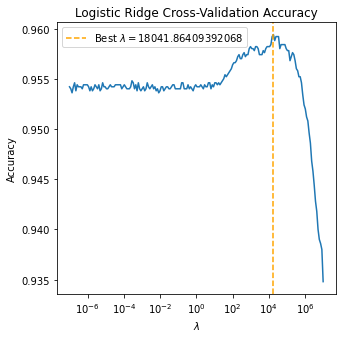

In [38]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(lmbda_params, logistic_lasso_grid.cv_results_['mean_test_score'])
ax.axvline(1/logistic_lasso_grid.best_params_['C'], color='orange', linestyle='--', label=f"Best $\lambda={1/logistic_lasso_grid.best_params_['C']}$")
ax.set_xscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Ridge Cross-Validation Accuracy')
ax.legend()

In [39]:
# refit on entire training set
logistic_lasso_grid.best_estimator_.fit(train_49_X, train_49_y.values.flatten())
print(f"Logistic Ridge:\nTraining Accuracy for 4/9 classification: {logistic_lasso_grid.best_estimator_.score(train_49_X, train_49_y.values.flatten())}, Accuracy on validation set for 4/9 classification: {logistic_lasso_grid.best_estimator_.score(validate_49_X, validate_49_y.values.flatten())}")
add_row('Logistic Ridge', logistic_lasso_grid.best_estimator_.score(train_49_X, train_49_y.values.flatten()), logistic_lasso_grid.best_estimator_.score(validate_49_X, validate_49_y.values.flatten()))

Logistic Ridge:
Training Accuracy for 4/9 classification: 0.9672, Accuracy on validation set for 4/9 classification: 0.968


In [40]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = np.arange(1, 300, 5)
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': n_neighbors}, scoring='accuracy', cv=10, n_jobs=-1)
knn_grid.fit(train_49_X, train_49_y.values.flatten())


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256,
       261, 266, 271, 276, 281, 286, 291, 296])},
             scoring='accuracy')

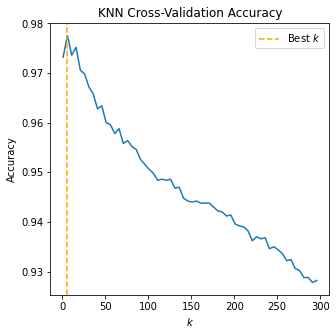

In [41]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(n_neighbors, knn_grid.cv_results_['mean_test_score'])
ax.axvline(knn_grid.best_params_['n_neighbors'], color='orange', linestyle='--', label='Best $k$')
ax.set_xlabel('$k$')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Cross-Validation Accuracy')
ax.legend()


narrow down the search

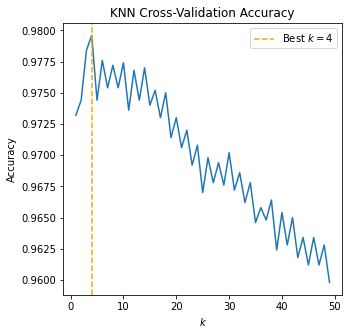

In [42]:
n_neighbors = np.arange(1, 50, 1)
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': n_neighbors}, scoring='accuracy', cv=10, n_jobs=-1)
knn_grid.fit(train_49_X, train_49_y.values.flatten())

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(n_neighbors, knn_grid.cv_results_['mean_test_score'])
ax.axvline(knn_grid.best_params_['n_neighbors'], color='orange', linestyle='--', label=f"Best $k={knn_grid.best_params_['n_neighbors']}$")
ax.set_xlabel('$k$')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Cross-Validation Accuracy')
ax.legend()


In [43]:
# refit
knn_grid.best_estimator_.fit(train_49_X, train_49_y.values.flatten())
print(f"KNN:\nTraining Accuracy for 4/9 classification: {knn_grid.best_estimator_.score(train_49_X, train_49_y.values.flatten())}, Accuracy on validation set for 4/9 classification: {knn_grid.best_estimator_.score(validate_49_X, validate_49_y.values.flatten())}")
add_row('KNN', knn_grid.best_estimator_.score(train_49_X, train_49_y.values.flatten()), knn_grid.best_estimator_.score(validate_49_X, validate_49_y.values.flatten()))

KNN:
Training Accuracy for 4/9 classification: 0.989, Accuracy on validation set for 4/9 classification: 0.9846666666666667


Since we know from above that the data for 4/9 classification is not linear separable, so we could barely improve much by using svm with linear kernel. We use polynomial and radial kernel instead.

In [64]:
SVC(kernel='poly', degree=2, C=0.001).fit(train_49_X, train_49_y.values.flatten())

SVC(C=0.001, degree=2, kernel='poly')

In [67]:
# SVM, poly kernel
from sklearn.svm import SVC
C_params = np.logspace(-4, 4, num=20)
order_params = np.arange(2, 10, 1)

svm_poly_grid = GridSearchCV(SVC(kernel='poly'), param_grid={'C': C_params, 'degree': order_params}, scoring='accuracy', cv=10, n_jobs=-1, verbose=10)
svm_poly_grid.fit(train_49_X, train_49_y.values.flatten())


#SVC(kernel='linear', C=1, gamma='scale').fit(train_49_X, train_49_y.values.flatten())
#svm_linear_grid = GridSearchCV(SVC(kernel='linear'), param_grid={'C': C_params}, scoring='accuracy', cv=5, n_jobs=5)
#svm_linear_grid.fit(train_49_X, train_49_y.values.flatten())



Fitting 10 folds for each of 160 candidates, totalling 1600 fits
[CV 7/10; 1/160] START C=0.0001, degree=2.......................................
[CV 1/10; 1/160] START C=0.0001, degree=2.......................................
[CV 4/10; 1/160] START C=0.0001, degree=2.......................................
[CV 3/10; 1/160] START C=0.0001, degree=2.......................................
[CV 2/10; 1/160] START C=0.0001, degree=2.......................................
[CV 5/10; 1/160] START C=0.0001, degree=2.......................................
[CV 6/10; 1/160] START C=0.0001, degree=2.......................................
[CV 8/10; 1/160] START C=0.0001, degree=2.......................................
[CV 9/10; 1/160] START C=0.0001, degree=2.......................................
[CV 10/10; 1/160] START C=0.0001, degree=2......................................
[CV 7/10; 1/160] END ........C=0.0001, degree=2;, score=0.884 total time=   2.4s
[CV 1/10; 1/160] END ........C=0.0001, degre

GridSearchCV(cv=10, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'degree': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy', verbose=10)

Text(0.5, 0.98, 'SVM Polynomial, Grid Search, cv=10')

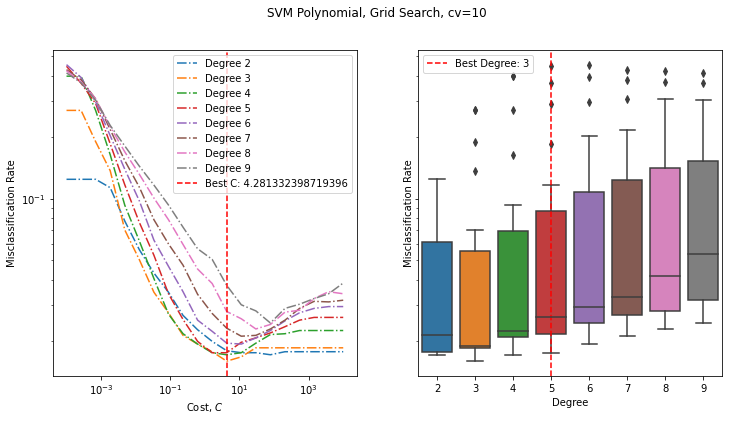

In [78]:
df_results_cv = pd.DataFrame(svm_poly_grid.cv_results_)
df_results_cv = df_results_cv[df_results_cv.columns[df_results_cv.columns.str.startswith('param_') | df_results_cv.columns.str.startswith('mean_test_score')]]
df_results_cv.columns = ['C', 'degree', 'mean_test_score']
df_results_cv['mean_test_score'] = 1-df_results_cv['mean_test_score']
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for degree in order_params:
    axs[0].plot(C_params, df_results_cv[df_results_cv['degree'] == degree]['mean_test_score'], label=f"Degree {degree}", linestyle='-.')
axs[0].set_xlabel('Cost, $C$')
axs[0].set_ylabel('Misclassification Rate')
axs[0].axvline(svm_poly_grid.best_params_['C'], color='r', linestyle='--', label=f"Best C: {svm_poly_grid.best_params_['C']}")
axs[0].loglog()
#axs[0].add_artist(axs[0].legend(*scatter.legend_elements(), title='Degree'))
axs[0].legend()
sns.boxplot(x='degree', y='mean_test_score', data=df_results_cv, ax=axs[1])
axs[1].set_xlabel('Degree')
axs[1].set_ylabel('Misclassification Rate')
axs[1].axvline(svm_poly_grid.best_params_['degree'], color='r', linestyle='--', label=f"Best Degree: {svm_poly_grid.best_params_['degree']}")
axs[1].set_yscale('log')
axs[1].legend()
fig.suptitle('SVM Polynomial, Grid Search, cv=10')



In [79]:
# narrow down the search space
## C - [10^-1, 10^2]
## degree - [2, 10]
C_params = np.logspace(-1, 2, num=30)
order_params = np.arange(2, 10, 1)

svm_poly_grid = GridSearchCV(SVC(kernel='poly'), param_grid={'C': C_params, 'degree': order_params}, scoring='accuracy', cv=10, n_jobs=-1, verbose=10)
svm_poly_grid.fit(train_49_X, train_49_y.values.flatten())

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV 2/10; 1/240] START C=0.1, degree=2..........................................
[CV 8/10; 1/240] START C=0.1, degree=2..........................................
[CV 7/10; 1/240] START C=0.1, degree=2..........................................
[CV 5/10; 1/240] START C=0.1, degree=2..........................................[CV 6/10; 1/240] START C=0.1, degree=2..........................................
[CV 3/10; 1/240] START C=0.1, degree=2..........................................

[CV 1/10; 1/240] START C=0.1, degree=2..........................................
[CV 4/10; 1/240] START C=0.1, degree=2..........................................
[CV 9/10; 1/240] START C=0.1, degree=2..........................................
[CV 10/10; 1/240] START C=0.1, degree=2.........................................
[CV 8/10; 1/240] END ...........C=0.1, degree=2;, score=0.982 total time=   0.7s
[CV 2/10; 1/240] END ...........C=0.1, degre

GridSearchCV(cv=10, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': array([  0.1       ,   0.1268961 ,   0.1610262 ,   0.20433597,
         0.25929438,   0.32903446,   0.41753189,   0.52983169,
         0.67233575,   0.85316785,   1.08263673,   1.3738238 ,
         1.74332882,   2.21221629,   2.8072162 ,   3.56224789,
         4.52035366,   5.73615251,   7.27895384,   9.23670857,
        11.72102298,  14.87352107,  18.87391822,  23.9502662 ,
        30.39195382,  38.56620421,  48.93900918,  62.10169419,
        78.80462816, 100.        ]),
                         'degree': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy', verbose=10)

Text(0.5, 0.98, 'SVM Polynomial, Grid Search, cv=10')

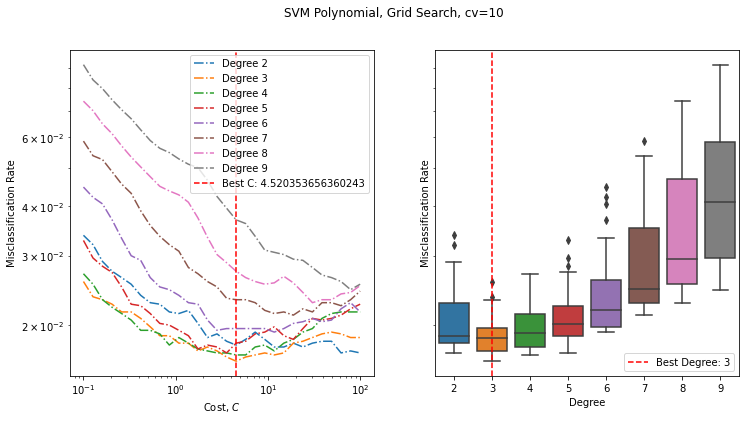

In [81]:
df_results_cv = pd.DataFrame(svm_poly_grid.cv_results_)
df_results_cv = df_results_cv[df_results_cv.columns[df_results_cv.columns.str.startswith('param_') | df_results_cv.columns.str.startswith('mean_test_score')]]
df_results_cv.columns = ['C', 'degree', 'mean_test_score']
df_results_cv['mean_test_score'] = 1-df_results_cv['mean_test_score']
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for degree in order_params:
    axs[0].plot(C_params, df_results_cv[df_results_cv['degree'] == degree]['mean_test_score'], label=f"Degree {degree}", linestyle='-.')
axs[0].set_xlabel('Cost, $C$')
axs[0].set_ylabel('Misclassification Rate')
axs[0].axvline(svm_poly_grid.best_params_['C'], color='r', linestyle='--', label=f"Best C: {svm_poly_grid.best_params_['C']}")
axs[0].loglog()
#axs[0].add_artist(axs[0].legend(*scatter.legend_elements(), title='Degree'))
axs[0].legend()
sns.boxplot(x='degree', y='mean_test_score', data=df_results_cv, ax=axs[1])
axs[1].set_xlabel('Degree')
axs[1].set_ylabel('Misclassification Rate')
axs[1].axvline(svm_poly_grid.best_params_['degree']-2, color='r', linestyle='--', label=f"Best Degree: {svm_poly_grid.best_params_['degree']}")
axs[1].set_yscale('log')
axs[1].legend()
fig.suptitle('SVM Polynomial, Grid Search, cv=10')



In [84]:
# refit the model with the best parameters
svm_poly_grid.best_estimator_.fit(train_49_X, train_49_y.values.flatten())
print(f"Training set accuracy: {svm_poly_grid.best_estimator_.score(train_49_X, train_49_y.values.flatten())}, Validation set accuracy: {svm_poly_grid.best_estimator_.score(validate_49_X, validate_49_y.values.flatten())}")
add_row('SVM poly kernel', svm_poly_grid.best_estimator_.score(train_49_X, train_49_y.values.flatten()), svm_poly_grid.best_estimator_.score(validate_49_X, validate_49_y.values.flatten()))
df_performance49

Training set accuracy: 0.998, Validation set accuracy: 0.99


,Classifier,Training Accuracy,Validation Accuracy
0,Logistic Regression,0.9688,0.965333
1,Logistic LASSO,0.9664,0.966000
2,QDA,0.9510,0.934667
3,Naive Bayes,0.7638,0.772000
4,Logistic Ridge,0.9672,0.968000
5,KNN,0.9890,0.984667
6,SVM poly kernel,0.9980,0.990000


In [85]:
# SVM with radial kernel
svc_rbf_gridsearch = GridSearchCV(SVC(kernel='rbf'), param_grid={
                        'C': np.exp(np.linspace(-5, 5, 20)),
                        'gamma': np.exp(np.linspace(-20, 1, 20))
                    }, cv=10, verbose=10, n_jobs=-1
                    )
svc_rbf_gridsearch.fit(train_49_X, train_49_y.values.flatten())

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
[CV 7/10; 1/400] START C=0.006737946999085467, gamma=2.061153622438558e-09......
[CV 4/10; 1/400] START C=0.006737946999085467, gamma=2.061153622438558e-09......
[CV 9/10; 1/400] START C=0.006737946999085467, gamma=2.061153622438558e-09......
[CV 1/10; 1/400] START C=0.006737946999085467, gamma=2.061153622438558e-09......
[CV 3/10; 1/400] START C=0.006737946999085467, gamma=2.061153622438558e-09......
[CV 10/10; 1/400] START C=0.006737946999085467, gamma=2.061153622438558e-09.....
[CV 5/10; 1/400] START C=0.006737946999085467, gamma=2.061153622438558e-09......
[CV 8/10; 1/400] START C=0.006737946999085467, gamma=2.061153622438558e-09......
[CV 2/10; 1/400] START C=0.006737946999085467, gamma=2.061153622438558e-09......
[CV 6/10; 1/400] START C=0.006737946999085467, gamma=2.061153622438558e-09......
[CV 1/10; 1/400] END C=0.006737946999085467, gamma=2.061153622438558e-09;, score=0.860 total time=   2.6s
[CV 10/10; 1/400] E

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([6.73794700e-03, 1.14052191e-02, 1.93054388e-02, 3.26780189e-02,
       5.53135794e-02, 9.36284440e-02, 1.58483425e-01, 2.68262453e-01,
       4.54083724e-01, 7.68620527e-01, 1.30103213e+00, 2.20223705e+00,
       3.72769274e+00, 6.30980809e+00, 1.06805150e+01, 1.80787433e+01,
       3.06016103e+01, 5.17988745e+01, 8.76791572e+01, 1.48413159e+02]),
                         'gamma': array([2.06115362e-09, 6.22472332e-09, 1.87987834e-08, 5.67726849e-08,
       1.71454593e-07, 5.17796147e-07, 1.56375426e-06, 4.72256773e-06,
       1.42622448e-05, 4.30722518e-05, 1.30079023e-04, 3.92841136e-04,
       1.18638773e-03, 3.58291363e-03, 1.08204676e-02, 3.26780189e-02,
       9.86882415e-02, 2.98040375e-01, 9.00087626e-01, 2.71828183e+00])},
             verbose=10)

Text(0.5, 0.98, 'SVM Radial, Grid Search, cv=10')

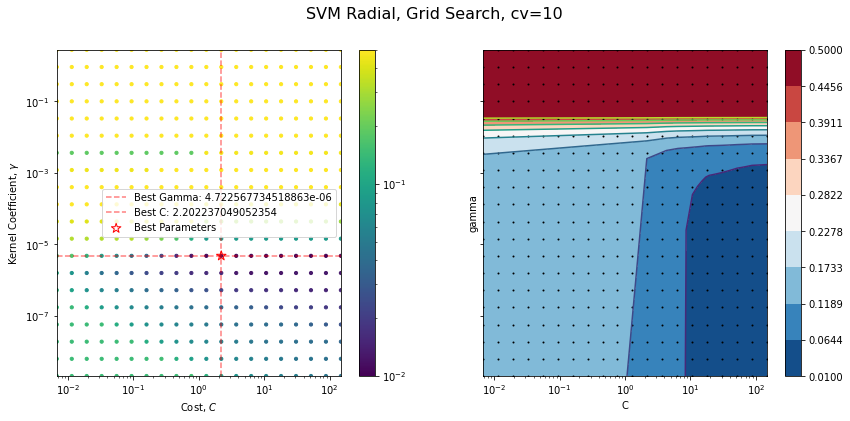

In [93]:
import matplotlib
from scipy.interpolate import griddata
df_results_cv = pd.DataFrame(svc_rbf_gridsearch.cv_results_)
df_results_cv.to_feather('df_results_cv_rbf.feather')
df_results_cv = df_results_cv[df_results_cv.columns[df_results_cv.columns.str.startswith('param_') | df_results_cv.columns.str.startswith('mean_test_score')]]
df_results_cv.columns = ['C', 'gamma', 'mean_test_score']
df_results_cv['mean_test_score'] = 1-df_results_cv['mean_test_score']

fig, axs = plt.subplots(1,2,figsize=(14, 6), sharey=True, sharex=True)
ax = axs[0]
scatter = ax.scatter(df_results_cv['C'], df_results_cv['gamma'], s=10, c=df_results_cv['mean_test_score'], cmap='viridis', norm=matplotlib.colors.LogNorm())
ax.axhline(svc_rbf_gridsearch.best_params_['gamma'], color='r', linestyle='--', label=f"Best Gamma: {svc_rbf_gridsearch.best_params_['gamma']}", alpha=0.5)
ax.axvline(svc_rbf_gridsearch.best_params_['C'], color='r', linestyle='--', label=f"Best C: {svc_rbf_gridsearch.best_params_['C']}", alpha=0.5)
ax.scatter(svc_rbf_gridsearch.best_params_['C'], svc_rbf_gridsearch.best_params_['gamma'], s=100, label='Best Parameters', facecolors='none', edgecolors='r', marker='*')
ax.set_xlabel('Cost, $C$')
ax.set_ylabel('Kernel Coefficient, $\gamma$')
ax.loglog()
fig.colorbar(scatter, ax=ax)
ax.legend()

ax = axs[1]
# define grid
xi = np.linspace(df_results_cv['C'].min(), df_results_cv['C'].max(), 70)
yi = np.linspace(df_results_cv['gamma'].min(), df_results_cv['gamma'].max(), 70)
xi, yi = np.meshgrid(xi, yi)

# interpolate
zi = griddata((df_results_cv['C'], df_results_cv['gamma']), df_results_cv['mean_test_score'], (xi, yi), method='linear')

# plot
ax.contour(xi, yi, zi, levels=np.linspace(np.min(df_results_cv['mean_test_score']), np.max(df_results_cv['mean_test_score']), 10))
contour_i = ax.contourf(xi, yi, zi, levels=np.linspace(np.min(df_results_cv['mean_test_score']), np.max(df_results_cv['mean_test_score']), 10), cmap='RdBu_r')
fig.colorbar(contour_i, ax=ax)
ax.scatter(df_results_cv['C'], df_results_cv['gamma'], c='k', s=1)
ax.set_xlabel('C')
ax.set_ylabel('gamma')
ax.loglog()

fig.suptitle('SVM Radial, Grid Search, cv=10', fontsize=16)

In [94]:
# refit the model with the best parameters
svc_rbf_gridsearch.best_estimator_.fit(train_49_X, train_49_y.values.flatten())
print(f"Training set accuracy: {svc_rbf_gridsearch.best_estimator_.score(train_49_X, train_49_y.values.flatten())}, Validation set accuracy: {svc_rbf_gridsearch.best_estimator_.score(validate_49_X, validate_49_y.values.flatten())}")
add_row('SVM radial kernel', svc_rbf_gridsearch.best_estimator_.score(train_49_X, train_49_y.values.flatten()), svc_rbf_gridsearch.best_estimator_.score(validate_49_X, validate_49_y.values.flatten()))
df_performance49

Training set accuracy: 0.9998, Validation set accuracy: 0.9906666666666667


,Classifier,Training Accuracy,Validation Accuracy
0,Logistic Regression,0.9688,0.965333
1,Logistic LASSO,0.9664,0.966000
2,QDA,0.9510,0.934667
3,Naive Bayes,0.7638,0.772000
4,Logistic Ridge,0.9672,0.968000
5,KNN,0.9890,0.984667
6,SVM poly kernel,0.9980,0.990000
7,SVM radial kernel,0.9998,0.990667


In [95]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_params = {
            'n_estimators': np.linspace(10, 100, 10, dtype=int),
            'max_depth': np.linspace(1, 25, 5, dtype=int),
            'max_features': np.linspace(0.1, 1, 10, dtype=float),
            'min_samples_split': np.linspace(2, 10, 5, dtype=int),
            'min_samples_leaf': np.linspace(1, 5, 5, dtype=int)
        }


rf_gridsearch = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=10, verbose=10, n_jobs=-1)
rf_gridsearch.fit(train_49_X, train_49_y.values.flatten())


Fitting 10 folds for each of 12500 candidates, totalling 125000 fits
[CV 1/10; 1/12500] START max_depth=1, max_features=0.1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 8/10; 1/12500] START max_depth=1, max_features=0.1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/10; 1/12500] START max_depth=1, max_features=0.1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 5/10; 1/12500] START max_depth=1, max_features=0.1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 6/10; 1/12500] START max_depth=1, max_features=0.1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 7/10; 1/12500] START max_depth=1, max_features=0.1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/10; 1/12500] START max_depth=1, max_features=0.1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/10; 1/12500] START max_depth=1, max_features=0.1, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/10; 1/12500] END max_

KeyboardInterrupt: 